# **Retention Analysis of Transaction**

## 🗂️ **Project Overview**

Dalam proyek ini, saya akan menganalisis retention rate pelanggan berdasarkan data transaksi. Tujuannya adalah untuk memahami seberapa baik bisnis mempertahankan pelanggan dari waktu ke waktu. Analisis ini akan membantu saya mengidentifikasi pola pembelian berulang, faktor-faktor yang memengaruhi retensi, dan peluang untuk meningkatkan loyalitas pelanggan.

## 🎯 **Objectives**
1. Menghitung Retention Rate: Mengukur persentase pelanggan yang kembali melakukan pembelian dalam periode tertentu.
2. Mengidentifikasi Tren Retensi: Menganalisis pola waktu dan karakteristik pelanggan yang berkontribusi pada retensi.
3. Memberikan Rekomendasi: Menyusun strategi berdasarkan wawasan retensi untuk meningkatkan loyalitas pelanggan.


## 📊 **Data Description**
Dataset yang digunakan berisi informasi sebagai berikut:

- Transaction Details: Berisi data transaksi, termasuk tanggal, ID transaksi, dan status pesanan.
- Customer Details: Meliputi ID pelanggan untuk melacak pembelian berulang.
- Product Details: Informasi tentang produk yang dibeli, termasuk brand, product line, dan harga.
- Order Details: Mencakup status pesanan (online/offline) dan ukuran pesanan.

Langkah Analisis:

- Mengidentifikasi pelanggan unik setiap periode (bulan/tahun).
- Melacak pembelian berulang dari pelanggan unik pada periode berikutnya.
- Menghitung retention rate sebagai:

Retention Rate
=
Jumlah Pelanggan yang Kembali
/ Jumlah Pelanggan pada Periode Sebelumnya
×
100
%

# 🌟 Adventure Works: Comprehensive Performance Report

Retention Rate Over Time:

- Across most cohorts, the retention rate declines gradually in the second and third months.
- The April 2017 cohort stands out with the highest 3rd-month retention rate (46%), suggesting effective engagement strategies or product launches during this period.

Strong Recovery in July 2017:

- The July 2017 cohort displays a peak retention rate of 48% in the 4th month. This indicates a significant effort or event that successfully re-engaged users during this timeframe.

Long-Term Retention Stability:

- Retention rates stabilize around 37–39% in the later months (10th to 12th) for many cohorts, showcasing consistent user loyalty over time.


Peak Transaction Frequency:

- The highest number of customers completed 5-6 transactions, with over 600 customers in this range. This indicates a sweet spot where customers are most engaged.

Right-Skewed Distribution:

- The chart displays a right-skewed distribution, meaning most customers tend to have fewer transactions, while a smaller number of customers are highly active with 10+ transactions.

Declining Frequency with Higher Transactions:

- As the number of transactions increases beyond 6, the frequency drops significantly. Few customers reach 12-14 transactions, suggesting it is challenging to keep customers consistently engaged at higher levels.

Customer Base Segmentation:

- The majority of customers fall within the 2-8 transaction range, making this group a key target for retention and upselling strategies.


# Recommendations & Next Steps

# Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Bangkit 2024'			  'Colab Notebooks'		    'Learn Finance Track'
 BI				   data				    'Machine Learning'
'Business Analytics Himabis.pdf'  'Dicoding for financial analyst'   Prototype
 Classroom			   Document			     Sopyan_KRS.pdf


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from textwrap import wrap

In [3]:
file_path = "/content/drive/MyDrive/Document/Analysis Data/Dataset/project2/Transaction dataset.xlsx"
df = pd.read_excel(file_path)
df.shape

(20000, 13)

In [4]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


# Assesing the Data

In [5]:
df['product_class'] = df['product_class'].str.lower().str.title()
df['product_size'] = df['product_size'].str.lower().str.title()
df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,Medium,Medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,Medium,Large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,Low,Medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,Medium,Medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,Medium,Large,1765.30,709.48,42226.0


The goal of this code is to standardize the formatting of the string values in the product_class and product_size columns. This can be helpful to ensure consistency in your dataset, especially when analyzing or comparing these values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Missing values

<Axes: >

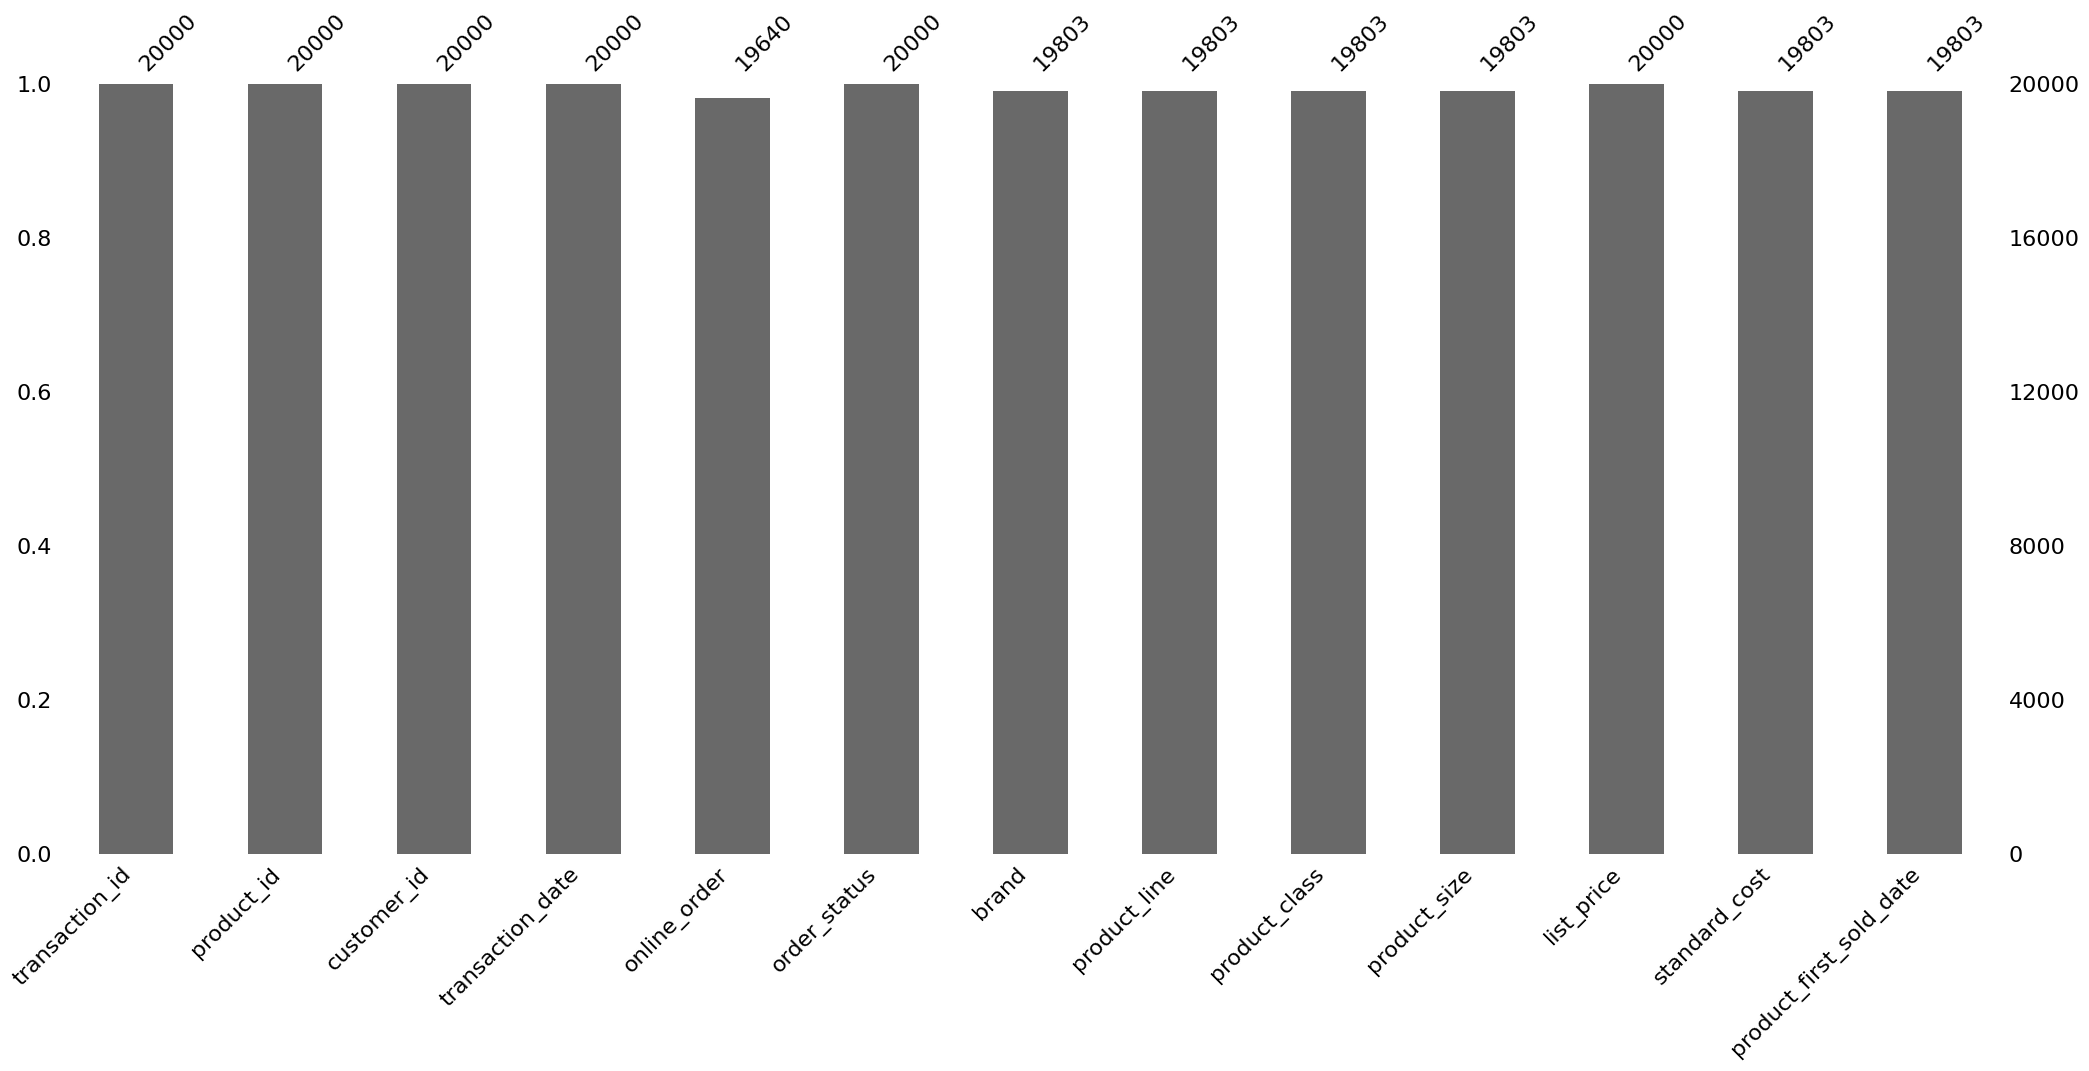

In [7]:
msno.bar(df)

In [8]:
pd.isnull(df).sum()

,0
transaction_id,0
product_id,0
customer_id,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197
product_size,197


- **Total Entries**: 20,000  
- **Missing Values**:  
  - `online_order`: 360 missing values  
  - `brand`, `product_line`, `product_class`, `product_size`, `standard_cost`, `product_first_sold_date`: 197 missing values each  
- **Data Types**:  
  - **Datetime**: `transaction_date`  
  - **Numerical**: `online_order`, `list_price`, `standard_cost`, `product_first_sold_date`  
  - **Categorical**: `order_status`, `brand`, `product_line`, `product_class`, `product_size`  
  - **Identifiers**: `transaction_id`, `product_id`, `customer_id`  


In [9]:
 # Handling missing values
# For 'online_order' (numeric), you can fill with the mean or a specific value
df['online_order'] = df['online_order'].fillna(df['online_order'].mean())

# For categorical columns ('brand', 'product_line', 'product_class', 'product_size'), you can fill with the mode
df['brand'] = df['brand'].fillna(df['brand'].mode()[0])
df['product_line'] = df['product_line'].fillna(df['product_line'].mode()[0])
df['product_class'] = df['product_class'].fillna(df['product_class'].mode()[0])
df['product_size'] = df['product_size'].fillna(df['product_size'].mode()[0])

# For 'standard_cost' and 'product_first_sold_date' (numeric), fill with the median
df['standard_cost'] = df['standard_cost'].fillna(df['standard_cost'].median())
df['product_first_sold_date'] = df['product_first_sold_date'].fillna(df['product_first_sold_date'].median())


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

The dataset have no missing values right now

### Duplicated

In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


There's no duplicated in dataset

In [12]:
df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,555.569552,38199.936350
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,0.500458,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.495492,582.825242,403.979638,2861.005439


In [13]:
# Convert 'transaction_date' to datetime if not already
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract Year and Month from the 'transaction_date' for analysis
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

# Exploratory Data Analysis

## Cohort Analysis

In [14]:
# Function to get the first day of the month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)

# Create TransactionMonth based on transaction_date
df['TransactionMonth'] = df['transaction_date'].apply(get_month)

# Grouping by customer_id and select the InovoiceMonth value
grouping = df.groupby('customer_id')['TransactionMonth']

# Assigning a minimum InvoiceMonth value to the dataset
df['CohortMonth'] = grouping.transform('min')

print(df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        Medium       Medium   
1     Approved   Trek Bicycles     Standard        Medium        Large   
2     Approved      OHM Cycles     Standard           Low       Medium   
3     Approved  Norco Bicycles     Standard        Medium       Medium   
4     Approved  Giant Bicycles     Standard        Medium        Large   

   list_price  standard_cost  product_first_sold_date  year  month  \
0       71.49         

### Calculate the Time Difference in Months (CohortIndex)

In [15]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [16]:
# Getting date integers for TransactionMonth and CohorMonth
trans_year, trans_month, _ = get_date_int(df, 'TransactionMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

# Calculate the difference in years and months
years_diff = trans_year - cohort_year
months_diff = trans_month - cohort_month

# Calculate the total month difference (CohortIndex), adding 1 to start from month 1 instead of 0
df['CohortIndex'] = years_diff * 12 + months_diff + 1

print(df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        Medium       Medium   
1     Approved   Trek Bicycles     Standard        Medium        Large   
2     Approved      OHM Cycles     Standard           Low       Medium   
3     Approved  Norco Bicycles     Standard        Medium       Medium   
4     Approved  Giant Bicycles     Standard        Medium        Large   

   list_price  standard_cost  product_first_sold_date  year  month  \
0       71.49         

# Group Data by CohortMonth and CohortIndex

In [17]:
# Group by CohortMonth and CohortIndex and count unique customers
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique customers per cohort group
cohort_data = grouping['customer_id'].apply(pd.Series.nunique).reset_index()

# Pivot the table to get cohort counts
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')

cohort_data.head()


,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [18]:
print(cohort_counts.round(1))

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-01-01   1354.0  486.0  508.0  509.0  502.0  483.0  518.0  529.0  500.0   
2017-02-01    800.0  325.0  298.0  313.0  288.0  298.0  308.0  281.0  329.0   
2017-03-01    484.0  167.0  174.0  167.0  182.0  184.0  172.0  212.0  189.0   
2017-04-01    336.0  111.0  121.0  153.0  143.0  121.0  142.0  126.0  132.0   
2017-05-01    210.0   85.0   81.0   87.0   71.0   74.0   73.0   81.0    NaN   
2017-06-01    122.0   45.0   44.0   47.0   46.0   46.0   53.0    NaN    NaN   
2017-07-01     77.0   26.0   29.0   32.0   37.0   24.0    NaN    NaN    NaN   
2017-08-01     51.0   19.0   21.0   17.0   13.0    NaN    NaN    NaN    NaN   
2017-09-01     23.0    7.0    7.0    9.0    NaN    NaN    NaN    NaN    NaN   
2017-10-01     20.0    6.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
2017-11-01     13.0    5.0    NaN    NaN    NaN    N

### Calculate Retention Rate

In [19]:
# Get the cohort sizes (first column for each cohort)
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention rates by dividing the cohort counts by cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Convert retention to percentages
retention.round(3) * 100


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization & Explanatory Analysis

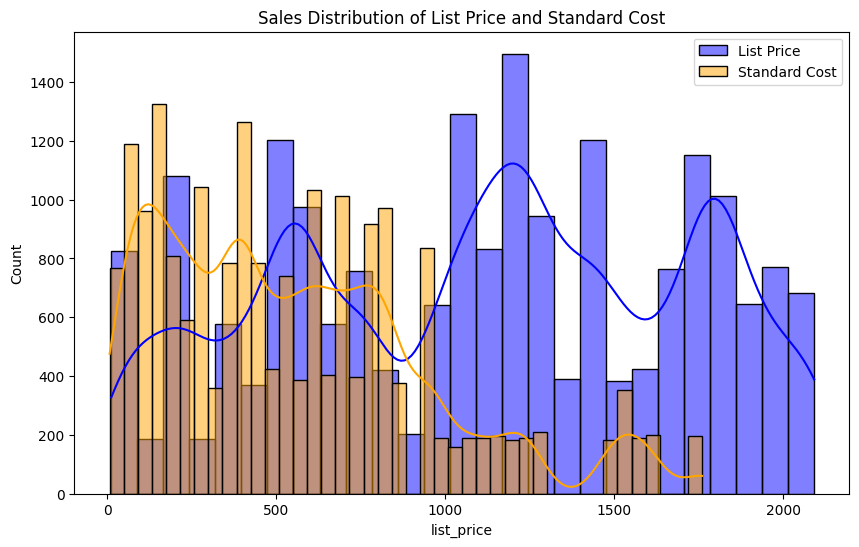

In [20]:
# 1. Sales Distribution (List Price vs Standard Cost)
plt.figure(figsize=(10, 6))
sns.histplot(df['list_price'], kde=True, color='blue', label='List Price')
sns.histplot(df['standard_cost'], kde=True, color='orange', label='Standard Cost')
plt.title('Sales Distribution of List Price and Standard Cost')
plt.legend()
plt.show()

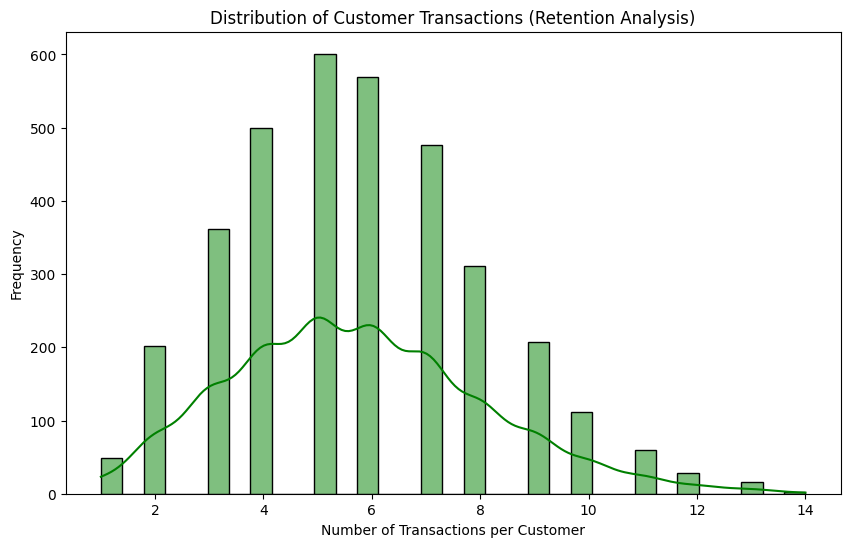

In [21]:
# 2. Analyze Retention: Count of transactions per customer
customer_transactions = df.groupby('customer_id').size().reset_index(name='transaction_count')
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions['transaction_count'], kde=True, color='green')
plt.title('Distribution of Customer Transactions (Retention Analysis)')
plt.xlabel('Number of Transactions per Customer')
plt.ylabel('Frequency')
plt.show()

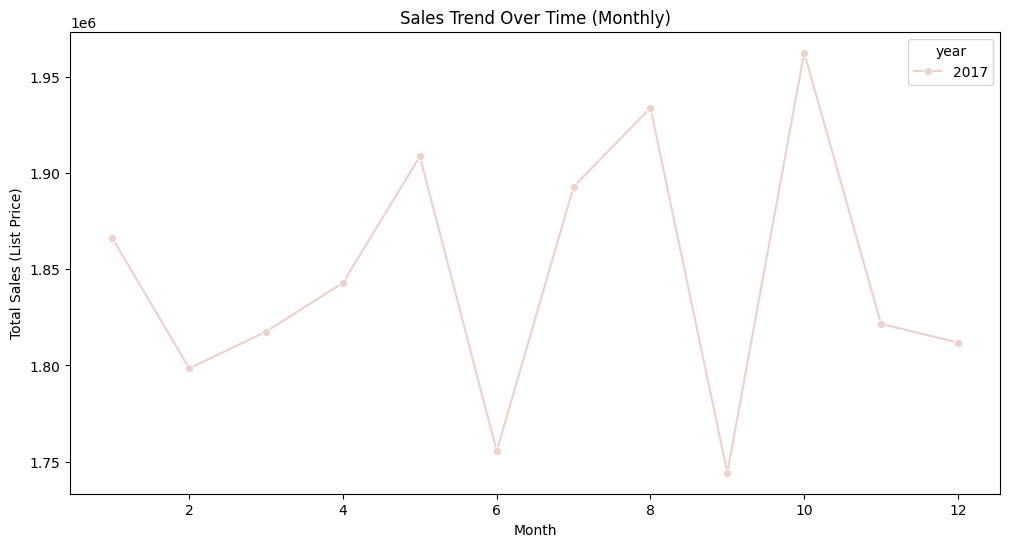

In [22]:
# 8. Sales Trend Over Time (Monthly)
sales_monthly = df.groupby(['year', 'month'])['list_price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='list_price', data=sales_monthly, hue='year', marker='o')
plt.title('Sales Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (List Price)')
plt.show()

# Retention rate

In [23]:
#  set the index of our Retention rate dataframe to a more readable string format

retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

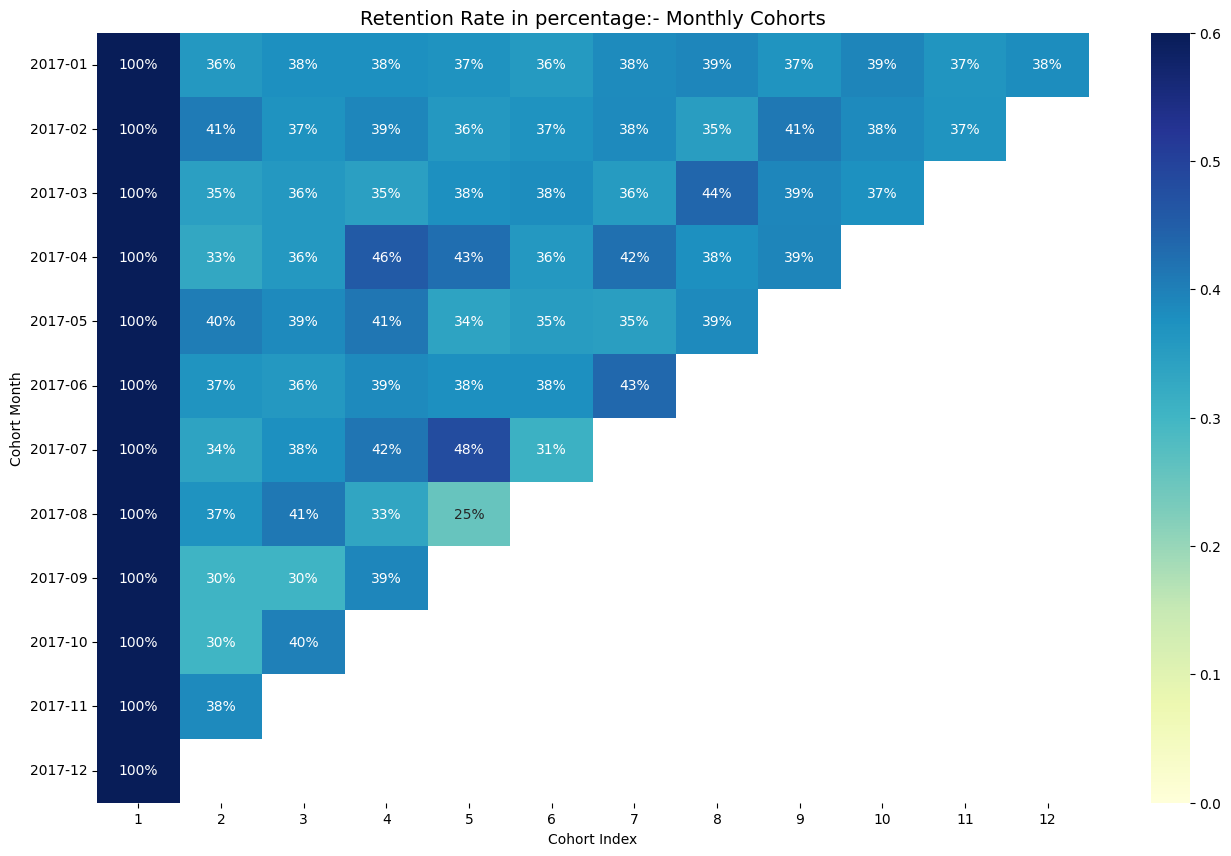

In [24]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation= 0)
plt.show()

In [25]:
# Konversi tanggal transaksi ke tipe datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Menghitung Retention Rate
def calculate_retention_rate(df):
    # Kelompokkan pelanggan berdasarkan tahun transaksi
    df['year'] = df['transaction_date'].dt.year

    # Identifikasi pelanggan unik per tahun
    customers_by_year = df.groupby('year')['customer_id'].unique()

    retention_rates = []
    for i in range(len(customers_by_year) - 1):
        previous_year = set(customers_by_year.iloc[i])
        current_year = set(customers_by_year.iloc[i + 1])
        retention = len(previous_year & current_year) / len(previous_year) * 100
        retention_rates.append(retention)

    return retention_rates

retention_rates = calculate_retention_rate(df)
